# 1. Importer les packages

In [639]:
# Importer les packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

# Charger des donnees

In [640]:

# Define the file names (ensure the Excel file is in the current working directory)
read_excel = 'Mining_Dataset.xlsx'
data = pd.read_excel(read_excel)

# Correct the file extension from .cvs to .csv
csv = 'Mining_Dataset.csv'
data.to_csv(csv, index=False)

# 3. Analyse de données

In [641]:
data.head(10)

,N°,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
0,1,Tumbwe,27.398758,-11.479370,1356.0,1.032063,Dur
1,2,Tumbwe,27.398610,-11.478151,1354.0,27.390744,Dur
2,3,Tumbwe,27.399395,-11.476759,1354.0,1.541371,Dur
3,4,Tumbwe,27.399987,-11.475205,1354.0,1.081573,Dur
4,5,Tumbwe,27.400558,-11.474226,1353.0,1.364352,Dur
5,6,Tumbwe,27.399462,-11.473477,1352.0,1.193886,Dur
6,7,Tumbwe,27.397897,-11.472683,1353.0,1.470506,Dur
7,8,Tumbwe,27.396160,-11.473234,1352.0,1.956046,Dur
8,9,Tumbwe,27.395137,-11.473340,1352.0,0.715264,Terne
9,10,Tumbwe,27.394444,-11.474650,1350.0,0.653490,Terne


In [642]:
data.tail()

,N°,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
5242,5243,Gambela,27.480643,-11.614738,1285.0,1.695698,Dur
5243,5244,Gambela,27.480092,-11.614721,1284.0,3.926087,Dur
5244,5245,Gambela,27.477062,-11.612963,1287.0,1.738089,Dur
5245,5246,Gambela,27.476266,-11.613941,1279.0,11.160760,Dur
5246,5247,Gambela,27.477834,-11.614092,1284.0,5.506705,Dur


In [643]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5247 entries, 0 to 5246
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   N°         5247 non-null   int64  
 1   Site       5247 non-null   object 
 2   Longitude  5247 non-null   float64
 3   Latitude   5247 non-null   float64
 4   Altitude   5247 non-null   float64
 5   Ic         5247 non-null   float64
 6   Classe_Ic  5247 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 287.1+ KB


In [644]:
data.shape

(5247, 7)

In [645]:
data.isnull().sum()

N°           0
Site         0
Longitude    0
Latitude     0
Altitude     0
Ic           0
Classe_Ic    0
dtype: int64

# Pretraitement des donnees

In [646]:
labeling = LabelEncoder()

In [647]:
data['Site'] = labeling.fit_transform(data['Site'])
data['Classe_Ic'] = labeling.fit_transform(data['Classe_Ic'])

In [648]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5247 entries, 0 to 5246
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   N°         5247 non-null   int64  
 1   Site       5247 non-null   int64  
 2   Longitude  5247 non-null   float64
 3   Latitude   5247 non-null   float64
 4   Altitude   5247 non-null   float64
 5   Ic         5247 non-null   float64
 6   Classe_Ic  5247 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 287.1 KB


In [649]:
data['Site'].unique()

array([10,  7,  8,  3,  9,  2,  1,  6,  0,  5,  4])

In [650]:
data['Classe_Ic'].unique()

array([0, 5, 2, 1, 3, 4])

In [651]:
data.tail()

,N°,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
5242,5243,4,27.480643,-11.614738,1285.0,1.695698,0
5243,5244,4,27.480092,-11.614721,1284.0,3.926087,0
5244,5245,4,27.477062,-11.612963,1287.0,1.738089,0
5245,5246,4,27.476266,-11.613941,1279.0,11.160760,0
5246,5247,4,27.477834,-11.614092,1284.0,5.506705,0


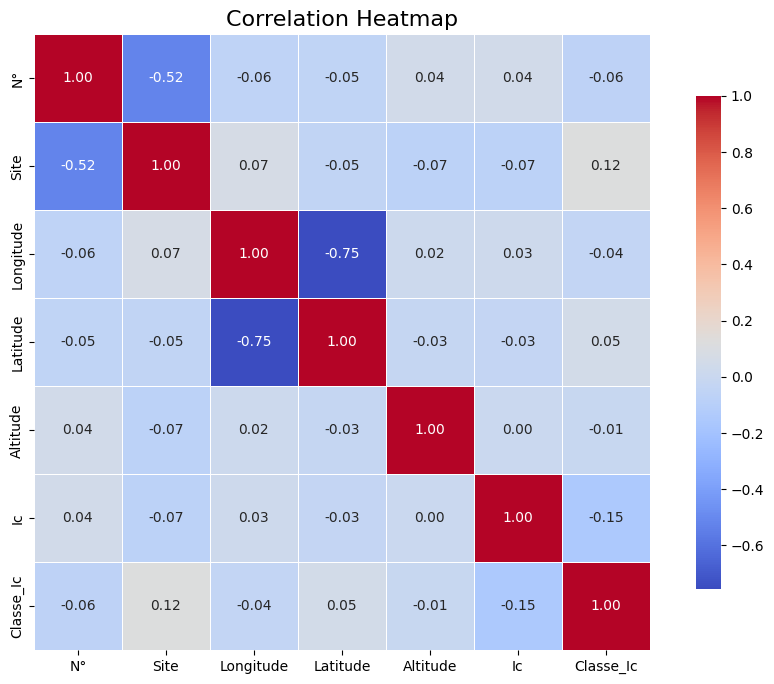

In [652]:

plt.figure(figsize=(12, 8))
sns.heatmap(
    data.corr(),
    annot=True,            
    fmt=".2f",               
    cmap='coolwarm',          
    square=True,              
    linewidths=0.5,         
    cbar_kws={"shrink": .8},
)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [653]:
data.corr().Classe_Ic.sort_values(ascending=False)

Classe_Ic    1.000000
Site         0.118282
Latitude     0.049534
Altitude    -0.012874
Longitude   -0.038096
N°          -0.061860
Ic          -0.150931
Name: Classe_Ic, dtype: float64

In [654]:
data.isnull().sum()

N°           0
Site         0
Longitude    0
Latitude     0
Altitude     0
Ic           0
Classe_Ic    0
dtype: int64

In [655]:
sub_data = data[['Site', 'Longitude', 'Latitude', 'Altitude', 'Ic', 'Classe_Ic']]


In [656]:

print(sub_data.isnull().sum())
print(np.isinf(sub_data).sum())

Site         0
Longitude    0
Latitude     0
Altitude     0
Ic           0
Classe_Ic    0
dtype: int64
Site         0
Longitude    0
Latitude     0
Altitude     0
Ic           0
Classe_Ic    0
dtype: int64


In [657]:
print(sub_data.shape)
sub_data.head()

(5247, 6)


,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
0,10,27.398758,-11.479370,1356.0,1.032063,0
1,10,27.398610,-11.478151,1354.0,27.390744,0
2,10,27.399395,-11.476759,1354.0,1.541371,0
3,10,27.399987,-11.475205,1354.0,1.081573,0
4,10,27.400558,-11.474226,1353.0,1.364352,0


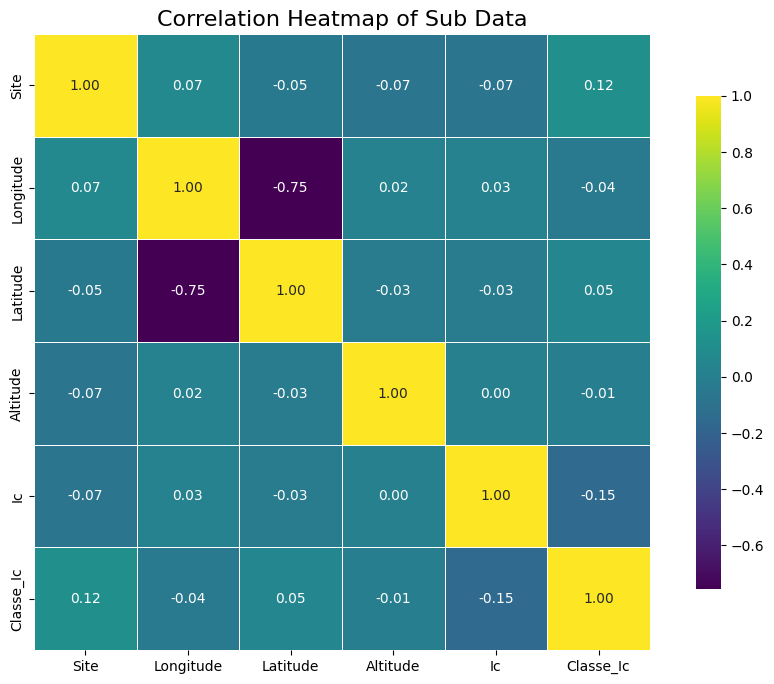

In [658]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    sub_data.corr(),
    annot=True,               # Show correlation coefficients
    fmt=".2f",                # Format the annotations to 2 decimal places
    cmap='viridis',           # Choose a different color palette
    square=True,              # Make cells square-shaped
    linewidths=0.5,          # Add lines between cells
    cbar_kws={"shrink": .8}, # Shrink the color bar
)
plt.title('Correlation Heatmap of Sub Data', fontsize=16)
plt.show()

# 5. Diviser les donnees : Train et Test

In [659]:
# Diviser les donnees : Train et Test
X = sub_data.iloc[ :, :-1]
y = sub_data.iloc[ :, -1]
y_train_categorical = to_categorical(y_train, num_classes=6) 

In [660]:
print("X-train Shape:", X_train.shape)
print("y-train Shape:", y_train.shape)
print("X-test Shape:", X_test.shape)
print("y-test Shape:", y_test.shape)

X-train Shape: (3672, 5)
y-train Shape: (3672,)
X-test Shape: (1575, 5)
y-test Shape: (1575,)


In [661]:
X_train

array([[ 0.33796978,  0.06639143, -0.01201733, -0.03298086,  3.62821225],
       [ 0.33796978,  0.03139092, -0.03497683, -0.03300519, -0.22502749],
       [ 0.33796978,  0.06482816, -0.01650382, -0.03298437, -0.25109193],
       ...,
       [ 0.33796978,  0.02270343, -0.02231841, -0.03302321, -0.17136448],
       [ 0.33796978,  0.06579706,  0.01173296, -0.03296854, -0.22182673],
       [ 0.33796978,  0.05325448,  0.01229189, -0.03298862, -0.2383389 ]])

In [662]:
y_train

3379    0
2723    0
3208    0
4480    0
3945    2
       ..
2792    0
3321    0
3007    0
951     0
1295    0
Name: Classe_Ic, Length: 3672, dtype: int64

In [663]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [664]:
X_train

array([[ 0.33796978,  0.06639143, -0.01201733, -0.03298086,  3.62821225],
       [ 0.33796978,  0.03139092, -0.03497683, -0.03300519, -0.22502749],
       [ 0.33796978,  0.06482816, -0.01650382, -0.03298437, -0.25109193],
       ...,
       [ 0.33796978,  0.02270343, -0.02231841, -0.03302321, -0.17136448],
       [ 0.33796978,  0.06579706,  0.01173296, -0.03296854, -0.22182673],
       [ 0.33796978,  0.05325448,  0.01229189, -0.03298862, -0.2383389 ]])

In [665]:
X_test

array([[ 0.33796978,  0.05321528,  0.01050459, -0.03298969, -0.29406816],
       [ 0.33796978,  0.06453343,  0.04799319, -0.03295974,  2.06369801],
       [ 0.33796978,  0.04334818,  0.0820353 , -0.03298587, -0.41307001],
       ...,
       [ 0.33796978,  0.05368972,  0.0126725 , -0.03298853, -0.24458294],
       [ 0.33796978,  0.07744264, -0.01722103, -0.03296231, -0.22182673],
       [ 0.33796978,  0.03647843,  0.05516459, -0.03298829, -0.28439414]])

In [666]:
print(sub_data.isnull().sum())
print(np.isinf(sub_data).sum())

Site         0
Longitude    0
Latitude     0
Altitude     0
Ic           0
Classe_Ic    0
dtype: int64
Site         0
Longitude    0
Latitude     0
Altitude     0
Ic           0
Classe_Ic    0
dtype: int64


# 6. Construire le Shallow Neural Network

In [667]:
# Creer une instance de la Classe Sequential
model = Sequential()

In [668]:
# En supposant que X_train a 5 caractéristiques
model.add(Dense(10, input_shape=(5,), activation='relu')) 

# Ajoutez une couche de sortie avec 6 neurones et une activation softmax pour la classification multi-classes
model.add(Dense(6, activation='softmax'))  

# Compilez le modèle avec l'optimiseur Adam, la perte d'entropie croisée catégorique et l'exactitude comme métrique
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the training data with validation split
history = model.fit(X_train, y_train_categorical, epochs=100, batch_size=10, validation_split=0.2, verbose=1)

Epoch 1/100
294/294 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3421 - loss: 1.7997 - val_accuracy: 0.7714 - val_loss: 1.1235
Epoch 2/100
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7804 - loss: 0.9763 - val_accuracy: 0.7728 - val_loss: 0.8126
Epoch 3/100
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7803 - loss: 0.7763 - val_accuracy: 0.7891 - val_loss: 0.7391
Epoch 4/100
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7798 - loss: 0.7392 - val_accuracy: 0.7891 - val_loss: 0.7008
Epoch 5/100
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7768 - loss: 0.7205 - val_accuracy: 0.7891 - val_loss: 0.6763
Epoch 6/100
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7891 - loss: 0.6687 - val_accuracy: 0.7891 - val_loss: 0.6618
Epoch 7/100
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7801 - loss: 0.6694 - val_accuracy: 0.7878 - val_loss: 0.6467
Epoch 8/100
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7797 - loss: 0.6505 - val_accu

In [669]:
y_test_categorical = to_categorical(y_test, num_classes=6)

In [670]:
loss, accuracy = model.evaluate(X_test, y_test_categorical)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9422 - loss: 0.1401 


In [671]:
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']

val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

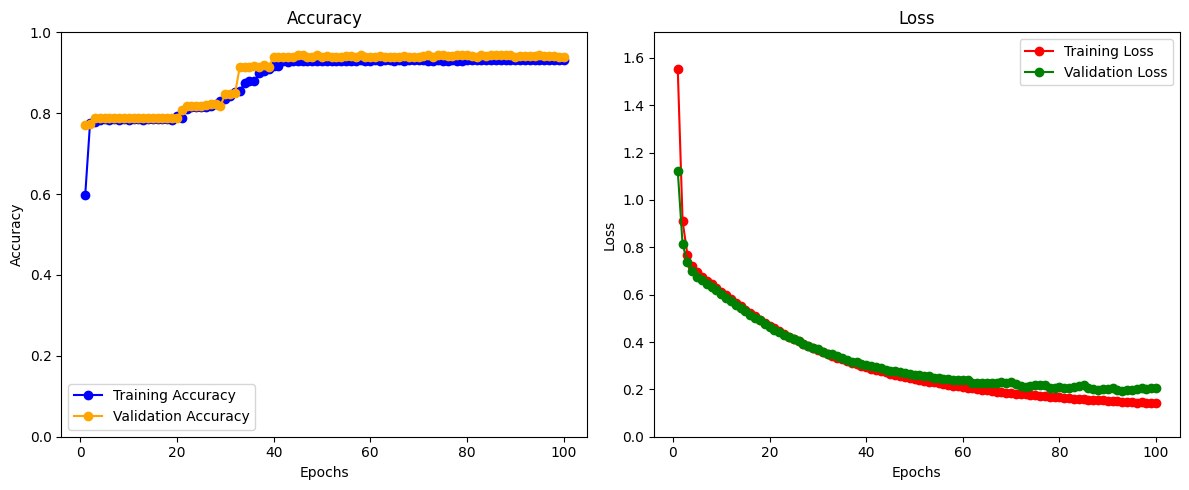

In [672]:
import matplotlib.pyplot as plt

# Tracer l'exactitude et la perte d'entraînement et de validation
plt.figure(figsize=(12, 5))

# Exactitude
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, color='blue', marker='o', label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, color='orange', marker='o', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.ylim(0, 1)  # Limiter l'axe Y entre 0 et 1 pour l'exactitude
plt.legend()

# Perte
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss) + 1), train_loss, color='red', marker='o', label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, color='green', marker='o', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.ylim(0, max(max(train_loss), max(val_loss)) * 1.1)  # Ajuster l'axe Y pour la perte
plt.legend()

# Afficher les graphiques
plt.tight_layout()
plt.show()

# 8. Evaluer le modèle

In [673]:
# Supposons que 'model' est votre modèle entraîné et 'X_test' est votre ensemble de test
y_pred = model.predict(X_test)
# Afficher les prédictions
print(y_pred)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[[6.41564606e-03 4.76566929e-04 2.18573630e-01 6.60565129e-05
  1.94596396e-07 7.74467945e-01]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.66567962e-16 9.99115765e-01 1.47771004e-06 4.53857012e-07
  7.19416280e-13 8.82344379e-04]
 ...
 [9.69639242e-01 1.36267166e-08 2.14748215e-02 3.75017152e-07
  2.50031071e-08 8.88560060e-03]
 [9.99233842e-01 8.04780634e-12 6.64450694e-04 2.80461654e-09
  6.82862045e-10 1.01726786e-04]
 [3.10203582e-02 1.55339541e-04 2.89065301e-01 5.45445546e-05
  3.19299943e-07 6.79704130e-01]]


In [677]:

# Convert probabilities to discrete class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculer et afficher les métriques
accuracy = metrics.accuracy_score(y_test, y_pred_classes)
print('Accuracy:', accuracy)

# Rapport de classification
print(metrics.classification_report(y_test, y_pred_classes))

Accuracy: 0.9428571428571428
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1227
           1       1.00      0.98      0.99        55
           2       1.00      0.03      0.06        90
           3       0.60      1.00      0.75         3
           5       0.69      0.99      0.81       200

    accuracy                           0.94      1575
   macro avg       0.86      0.80      0.72      1575
weighted avg       0.96      0.94      0.92      1575



# 6. Selection au moins 5 Algorithms de Machine Learning

In [695]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [696]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

In [697]:
y_predict = lr_model.predict(X_test)
y_predict

array([0, 0, 5, ..., 0, 0, 0])

In [698]:
print("ACCURANCY DE LA REGRESSION LOGISTIQUE :", 100 * accuracy_score(y_test, y_predict))
print("MSE REGRESSION LOGISTIQUE:", mean_squared_error(y_test, y_predict))

ACCURANCY DE LA REGRESSION LOGISTIQUE : 78.66666666666666
MSE REGRESSION LOGISTIQUE: 3.857142857142857


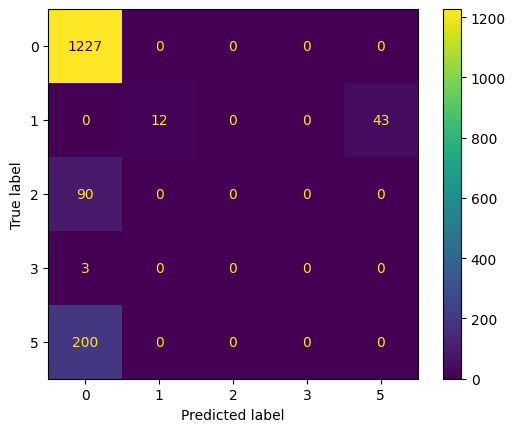

In [699]:
# Matrice de confusion
# Display the confusion matrix
ConfusionMatrixDisplay.from_estimator(lr_model, X_test, y_test)


In [702]:
model_dr = RandomForestClassifier(n_estimators=150 , criterion='entropy', random_state=150)

In [703]:
model_dr.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=150, random_state=150)

In [704]:
predict_dr = model_dr.predict(X_test)
predict_dr

array([5, 0, 1, ..., 0, 0, 5])

ACCURANCY DU RANDOM FOREST : 99.87301587301587
MSE RANDOM FOREST: 0.005079365079365079


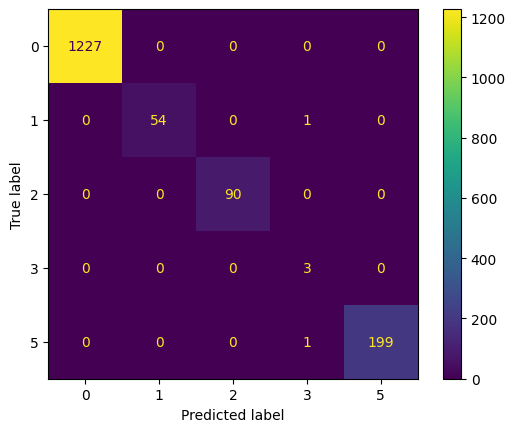

In [705]:
print("ACCURANCY DU RANDOM FOREST :", 100 * accuracy_score(y_test, predict_dr))
print("MSE RANDOM FOREST:", mean_squared_error(y_test, predict_dr))
# Matrice de confusion
ConfusionMatrixDisplay.from_estimator(model_dr, X_test, y_test)
plt.show()

In [706]:
KNN_model = KNeighborsClassifier(n_neighbors=150)

In [707]:
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=150)

In [708]:
knn_predict = KNN_model.predict(X_test)

In [709]:
print("ACCURANCY    KNN :", 100 * accuracy_score(y_test,knn_predict))
print ("MSE DE KNN :",mean_squared_error(y_test,knn_predict))

ACCURANCY    KNN : 93.14285714285714
MSE DE KNN : 0.5555555555555556


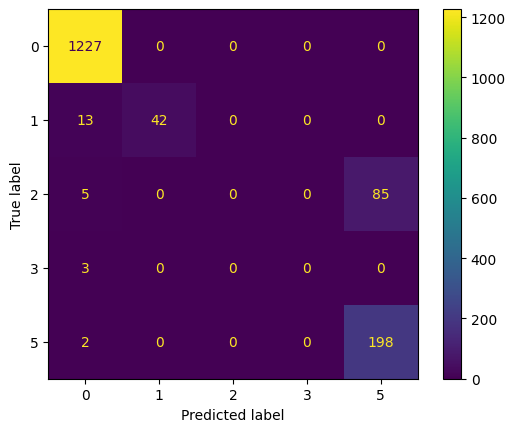

In [710]:
# Display the confusion matrix
ConfusionMatrixDisplay.from_estimator(KNN_model, X_test, y_test)
plt.show()

In [711]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

# Entraînement
gbc.fit(X_train, y_train)

# Prédiction
predictions = gbc.predict(X_test)

In [712]:
print("ACCURANCY  GRADIENT BOOSTING :", 100 * accuracy_score(y_test,predictions))
print ("MSE DE GRADIENT BOOSTING:",mean_squared_error(y_test,predictions))

ACCURANCY  GRADIENT BOOSTING : 99.87301587301587
MSE DE GRADIENT BOOSTING: 0.008253968253968255


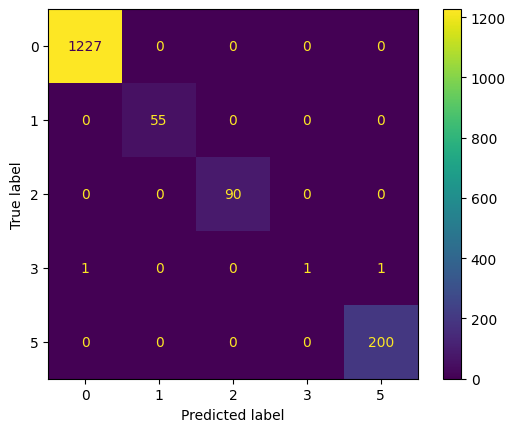

In [713]:
# Display the confusion matrix
ConfusionMatrixDisplay.from_estimator(gbc, X_test, y_test)
plt.show()

In [714]:
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)
svm_predict = svm_model.predict(X_test)
print("ACCURANCY SVM :", 100 * accuracy_score(y_test,svm_predict))
print ("MSE DE SVM :",mean_squared_error(y_test,svm_predict))

ACCURANCY SVM : 81.33333333333333
MSE DE SVM : 3.4304761904761905
